In [51]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import tree
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [2]:
#reading the individual csv files into different dataframes
df1=pd.read_csv(r'C:\Users\khana\Desktop\Youtube01-Psy.csv',header=None)
df2=pd.read_csv(r'C:\Users\khana\Desktop\Youtube02-KatyPerry.csv',header=None)
df3=pd.read_csv(r'C:\Users\khana\Desktop\Youtube03-LMFAO.csv',header=None)
df4=pd.read_csv(r'C:\Users\khana\Desktop\Youtube04-Eminem.csv',header=None)
df5=pd.read_csv(r'C:\Users\khana\Desktop\Youtube05-Shakira.csv',header=None)

# Data Preprocessing

In [3]:
#function to preprocess the data by adding labels and removing trivial data
def pre_process(df1):
    Df=df1.drop(0, axis=0)
    Df=Df.reset_index()
    Df = Df.rename(columns= {'index':'TEMP',0:'CommentID', 1:'Author', 2:'Date', 3:'Content', 4:'Class'})
    Df=Df.drop(columns='TEMP')
    return Df

In [4]:
#jerry is teaching me how to use github
df1 = pre_process(df1)
df2 = pre_process(df2)
df3 = pre_process(df3)
df4 = pre_process(df4)
df5 = pre_process(df5)

In [5]:
#creating a single dataframe from the five different dataframes by concatanating
Df= pd.concat((df1,df2,df3,df4,df5),ignore_index=True)

# Data Exploration and Visualization

In [6]:
Df

,CommentID,Author,Date,Content,Class
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [7]:
Df.describe()

,CommentID,Author,Date,Content,Class
count,1956,1956,1711,1956,1956
unique,1953,1792,1709,1760,2
top,_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0,M.E.S,2014-11-07T19:33:46,Check out this video on YouTube:﻿,1
freq,2,8,2,97,1005


In [8]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CommentID  1956 non-null   object
 1   Author     1956 non-null   object
 2   Date       1711 non-null   object
 3   Content    1956 non-null   object
 4   Class      1956 non-null   object
dtypes: object(5)
memory usage: 76.5+ KB


In [9]:
print(Df.isnull().sum())

CommentID      0
Author         0
Date         245
Content        0
Class          0
dtype: int64


In [10]:
#exploring the data based on the spam or ham
Df.groupby('Class').describe()

CommentID                                                           \
          count unique                                          top freq   
Class                                                                      
0           951    950  _2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0    2   
1          1005   1003  LneaDw26bFuH6iFsSrjlJLJIX3qD4R8-emuZ-aGUj0o    2   

      Author                        Date                                     \
       count unique       top freq count unique                         top   
Class                                                                         
0        951    922  5000palo    7   951    950  2013-10-05T00:57:25.078000   
1       1005    871     M.E.S    8   760    760         2014-10-02T13:17:36   

           Content                                                 
      freq   count unique                                top freq  
Class                                                              
0        2     951    919                                wow    4  
1        1    1005    841  Check out this video on YouTube:﻿   97

In [11]:
#inserting a new attribute 'length' that consists the character length of the comments
Df['Length']= Df['Content'].apply(len)
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CommentID  1956 non-null   object
 1   Author     1956 non-null   object
 2   Date       1711 non-null   object
 3   Content    1956 non-null   object
 4   Class      1956 non-null   object
 5   Length     1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [12]:
Df

,CommentID,Author,Date,Content,Class,Length
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39
...,...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,58
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,93
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,3
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,23


Text(0, 0.5, 'Frequency')

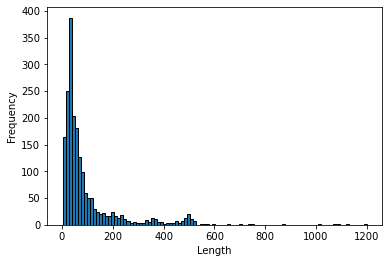

In [13]:
#creating a histogram based on the length of the comments and their frequency
plt.hist(Df['Length'], bins = 100, edgecolor="black")
plt.xlabel("Length")
plt.ylabel("Frequency")

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

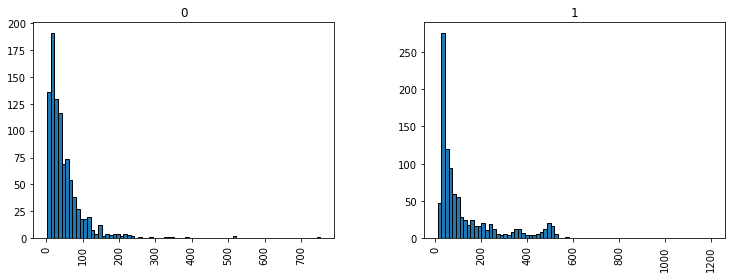

In [14]:
#exploring for patterns by grouping the above histogram by class 
Df.hist(column='Length', by='Class', bins=75, figsize=(12,4), edgecolor="black")

<AxesSubplot:xlabel='Class', ylabel='Length'>

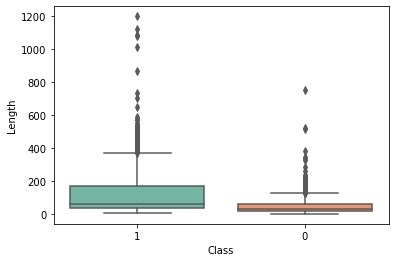

In [15]:
#creating a boxplot of the length of the comments to recognize the median and the spread of the lengths of the comments by class
sns.boxplot(x='Class', y ='Length', data=Df, palette = 'Set2')

<AxesSubplot:xlabel='Class', ylabel='count'>

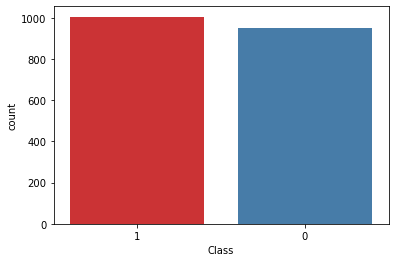

In [16]:
#creating a plot based on the total samples belonging to each class
sns.countplot(x='Class', data=Df, palette='Set1')

In [17]:
CmtAr= Df['Content']
print(CmtAr)

0       Huh, anyway check out this you[tube] channel: ...
1       Hey guys check out my new channel and our firs...
2                  just for test I have to say murdev.com
3        me shaking my sexy ass on my channel enjoy ^_^ ﻿
4                 watch?v=vtaRGgvGtWQ   Check this out .﻿
                              ...                        
1951    I love this song because we sing it at Camp al...
1952    I love this song for two reasons: 1.it is abou...
1953                                                  wow
1954                              Shakira u are so wiredo
1955                           Shakira is the best dancer
Name: Content, Length: 1956, dtype: object


# Data Normalization

In [18]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'needn', 'only', 'been', 'about', 'below', 'at', 'here', 'do', 'herself', 'during', 'mightn', 'now', 'each', 'being', "hadn't", 'his', 'not', 'didn', 'few', 'its', "wasn't", 'then', "shan't", 'my', "you're", 'theirs', 'all', 'into', 'were', 'because', 'or', 'hadn', 'same', 'too', 'wouldn', 'haven', 'a', 'whom', 'doing', 're', "should've", 'mustn', "wouldn't", 'on', 'what', 'did', "doesn't", 'just', 'yourselves', 'him', 'most', 'our', "hasn't", 'hasn', "don't", 'yourself', 'won', 'ain', 'm', "needn't", 'i', 'hers', 'there', 'from', 'both', 'can', 'isn', "couldn't", 'was', 'if', 'with', "weren't", 'until', 'them', 'such', "mightn't", 'as', 'weren', 'shan', 'these', 'more', 'so', 'again', 'shouldn', 'will', 'don', "that'll", 's', 'doesn', 'this', 'through', 'but', 'itself', 'other', 'o', 'it', 'y', 'by', 'he', 'wasn', "isn't", 'out', 'above', 'to', 'll', 'and', 'any', 'should', 'for', 'ourselves', 'in', 'down', 'no', 'while', "you'll", 'some', 'where', 'under', 'she', 'ours', "aren't", '

In [19]:
#creating a function as a custom analyzer to implemet feature selection, includes filtering out stop words and trivial characters and lemmatizing
def text_process(raw_text):
    porter=nltk.PorterStemmer
#     new_cmnt=list(filter(lambda letter: letter not in string.punctuation, raw_text))
#     new_cmnt = "".join(new_cmnt)
    new_cmnt=raw_text.split()             
    new_cmnt=list(filter(lambda word: word.lower() not in stop_words, new_cmnt))
    #porter=nltk.PorterStemmer()
    wnl = nltk.WordNetLemmatizer()
    list1=[]
    for word in new_cmnt:
        list1.append(wnl.lemmatize(word.lower()))
    return list1

In [20]:
Cmt_Processed = CmtAr.apply(text_process)

In [21]:
Cmt_Processed

0       [huh,, anyway, check, you[tube], channel:, kob...
1       [hey, guy, check, new, channel, first, vid, u,...
2                                 [test, say, murdev.com]
3             [shaking, sexy, as, channel, enjoy, ^_^, ﻿]
4                        [watch?v=vtarggvgtwq, check, .﻿]
                              ...                        
1951                     [love, song, sing, camp, time!!]
1952    [love, song, two, reasons:, 1.it, africa, 2.i,...
1953                                                [wow]
1954                                 [shakira, u, wiredo]
1955                              [shakira, best, dancer]
Name: Content, Length: 1956, dtype: object

In [22]:
Cmt_Processed=Cmt_Processed.apply(lambda x: " ".join(x) )

In [23]:
Cmt_Processed.iloc[54]

'get gwar play 2015 superbowl http://www.change.org/petitions/the-national-football-league-allow-gwar-to-perform-the-2015-super-bowl-halftime-show#share \ufeff'

# Splitting into Training and Testing Dataset

In [24]:
Y=Df['Class']

In [25]:
Y.iloc[54]

'1'

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(Cmt_Processed,Y, test_size=1/3, random_state=42)

In [27]:
X_test.shape

(652,)

In [28]:
X_train.shape

(1304,)

In [29]:
X_train

1879    know people make another account subscribing l...
834     else saw jesses dancing sorry spelled wrong pe...
1429    hey guy please subscribe channel im young dedi...
1063    hey guy subscribe chanel subscribe back like v...
1615                                                like﻿
                              ...                        
1130    everyone please subscribe channel go look video ﻿
1294    watch youtube video &quot;eminem -ytma artist ...
860                                              awesome﻿
1459                              like lyric music video﻿
1126                                learned shuffle them﻿
Name: Content, Length: 1304, dtype: object

In [30]:
Y_train

1879    1
834     0
1429    1
1063    1
1615    0
       ..
1130    1
1294    1
860     0
1459    0
1126    0
Name: Class, Length: 1304, dtype: object

# Vectorization

In [31]:
import scipy.sparse

In [32]:
#using built in word analyzer to preprocess data and creating a bag of words from our training data
bow_transformer = CountVectorizer(analyzer='word', strip_accents='unicode').fit(X_train)

#bow_transformer = CountVectorizer(analyzer= text_process).fit(CmtAr)

In [33]:
print(len(bow_transformer.vocabulary_))

3255


In [34]:
#creating a numerical sparse matrix from the text using the bag of words
cmt_testbow= bow_transformer.transform(X_test)
cmt_trainbow= bow_transformer.transform(X_train)

In [35]:
print(cmt_testbow)

  (0, 657)	1
  (0, 1797)	1
  (1, 497)	1
  (1, 1081)	1
  (1, 2644)	1
  (3, 208)	1
  (3, 257)	1
  (3, 500)	1
  (3, 540)	2
  (3, 544)	2
  (3, 859)	1
  (3, 1136)	1
  (3, 1211)	1
  (3, 1231)	2
  (3, 1294)	1
  (3, 1329)	1
  (3, 1546)	2
  (3, 1599)	3
  (3, 1625)	1
  (3, 1891)	1
  (3, 1951)	2
  (3, 2000)	1
  (3, 2026)	1
  (3, 2107)	1
  (3, 2166)	1
  :	:
  (648, 2831)	1
  (648, 2844)	1
  (648, 2982)	1
  (648, 3016)	1
  (648, 3028)	1
  (648, 3172)	1
  (648, 3181)	2
  (648, 3221)	1
  (648, 3235)	1
  (649, 108)	1
  (649, 156)	1
  (649, 2741)	1
  (649, 3089)	1
  (649, 3125)	1
  (650, 1838)	1
  (650, 1866)	1
  (650, 1983)	1
  (650, 2741)	1
  (651, 404)	1
  (651, 1327)	1
  (651, 1809)	1
  (651, 1978)	1
  (651, 2363)	1
  (651, 2537)	1
  (651, 2644)	1


In [36]:
#creating a equivalent dataframe of the countvectorizer matrix
df_bow=pd.DataFrame.sparse.from_spmatrix(cmt_trainbow, columns= bow_transformer.get_feature_names())

In [37]:
df_bow

,00,000,02,034,04,05,053012,0687119038,0cb8qfjaa,0d878a889c,...,zealous,zesty,zimbabwe,zip,zombie,zonepa,zxlightsoutxz,الاعلانات,لل,강남스타일
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#displaying documents that contain the token '00' once
df_bow0= df_bow[df_bow['00']==1]
df_bow0

,00,000,02,034,04,05,053012,0687119038,0cb8qfjaa,0d878a889c,...,zealous,zesty,zimbabwe,zip,zombie,zonepa,zxlightsoutxz,الاعلانات,لل,강남스타일
45,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
868,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#total non zero values in the matrix
cmt_trainbow.nnz

11816

In [40]:
print(cmt_trainbow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
#listing all the tokens (words in our case) in our bag of words
bow_transformer.get_feature_names()

['00',
 '000',
 '02',
 '034',
 '04',
 '05',
 '053012',
 '0687119038',
 '0cb8qfjaa',
 '0d878a889c',
 '0laviqu2b',
 '10',
 '100',
 '1000',
 '10000000',
 '1000000000',
 '100000415527985',
 '100005244783212',
 '100877300245414',
 '101721377578919894134',
 '104999962146104962510',
 '106865403',
 '107297364',
 '1073741825',
 '1073741828',
 '1073741943',
 '108k',
 '109',
 '10b35481',
 '11',
 '1111',
 '1111111111111111111',
 '111719098841907',
 '111982027348137311818',
 '112720997191206369631',
 '11cpwb',
 '11th',
 '12',
 '123',
 '124',
 '126',
 '127',
 '128gb',
 '12year',
 '13',
 '13017194',
 '1337',
 '1340488',
 '1340489',
 '1340490',
 '1340491',
 '1340492',
 '1340493',
 '1340494',
 '1340499',
 '1340500',
 '1340502',
 '1340503',
 '1340504',
 '1340517',
 '1340518',
 '1340519',
 '1340520',
 '1340521',
 '1340522',
 '1340523',
 '1340524',
 '134470083389909',
 '14',
 '1408122684',
 '1442646731',
 '1446084',
 '1461302180794905',
 '1495323920744243',
 '1496241863981208',
 '1496273723978022',
 '1498

In [42]:
tfidf_transformer = TfidfTransformer().fit(cmt_trainbow)

In [43]:
messages_traintfidf = tfidf_transformer.transform(cmt_trainbow)
messages_testtfidf = tfidf_transformer.transform(cmt_testbow)

In [44]:
print(messages_traintfidf)

  (0, 2748)	0.4414084522756959
  (0, 2177)	0.26530128856845414
  (0, 1838)	0.257161806480071
  (0, 1748)	0.46011669993236193
  (0, 1684)	0.2825802263393381
  (0, 375)	0.4414084522756959
  (0, 265)	0.42689720802124587
  (1, 3194)	0.37159911040826166
  (1, 2679)	0.3928942488810015
  (1, 2656)	0.2945866861497052
  (1, 2486)	0.3447704088110368
  (1, 2172)	0.32709879483539045
  (1, 1623)	0.3928942488810015
  (1, 1027)	0.32008568954091854
  (1, 843)	0.37159911040826166
  (2, 3228)	0.10826448837379686
  (2, 3216)	0.08270207836415819
  (2, 3190)	0.13794152736100182
  (2, 3126)	0.11237911735136316
  (2, 3087)	0.08464486106284608
  (2, 3028)	0.04997305557211327
  (2, 3022)	0.12104569337861619
  (2, 2890)	0.10342665372028399
  (2, 2846)	0.08224676187081664
  (2, 2741)	0.12000265836543576
  :	:
  (1299, 2741)	0.3157060638360234
  (1299, 2229)	0.31713287765324777
  (1299, 1782)	0.4732831045328432
  (1299, 1317)	0.4427134400939893
  (1299, 1087)	0.45679922967363684
  (1299, 652)	0.3193132298823214
 

In [45]:
dense_test=messages_testtfidf.toarray()
dense_train=messages_traintfidf.toarray()

In [48]:
#creating a decision tree classifier to train and predict the class of our data
dt_clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=45, random_state=42)

In [49]:
dt_clf.fit(dense_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=45, random_state=42)

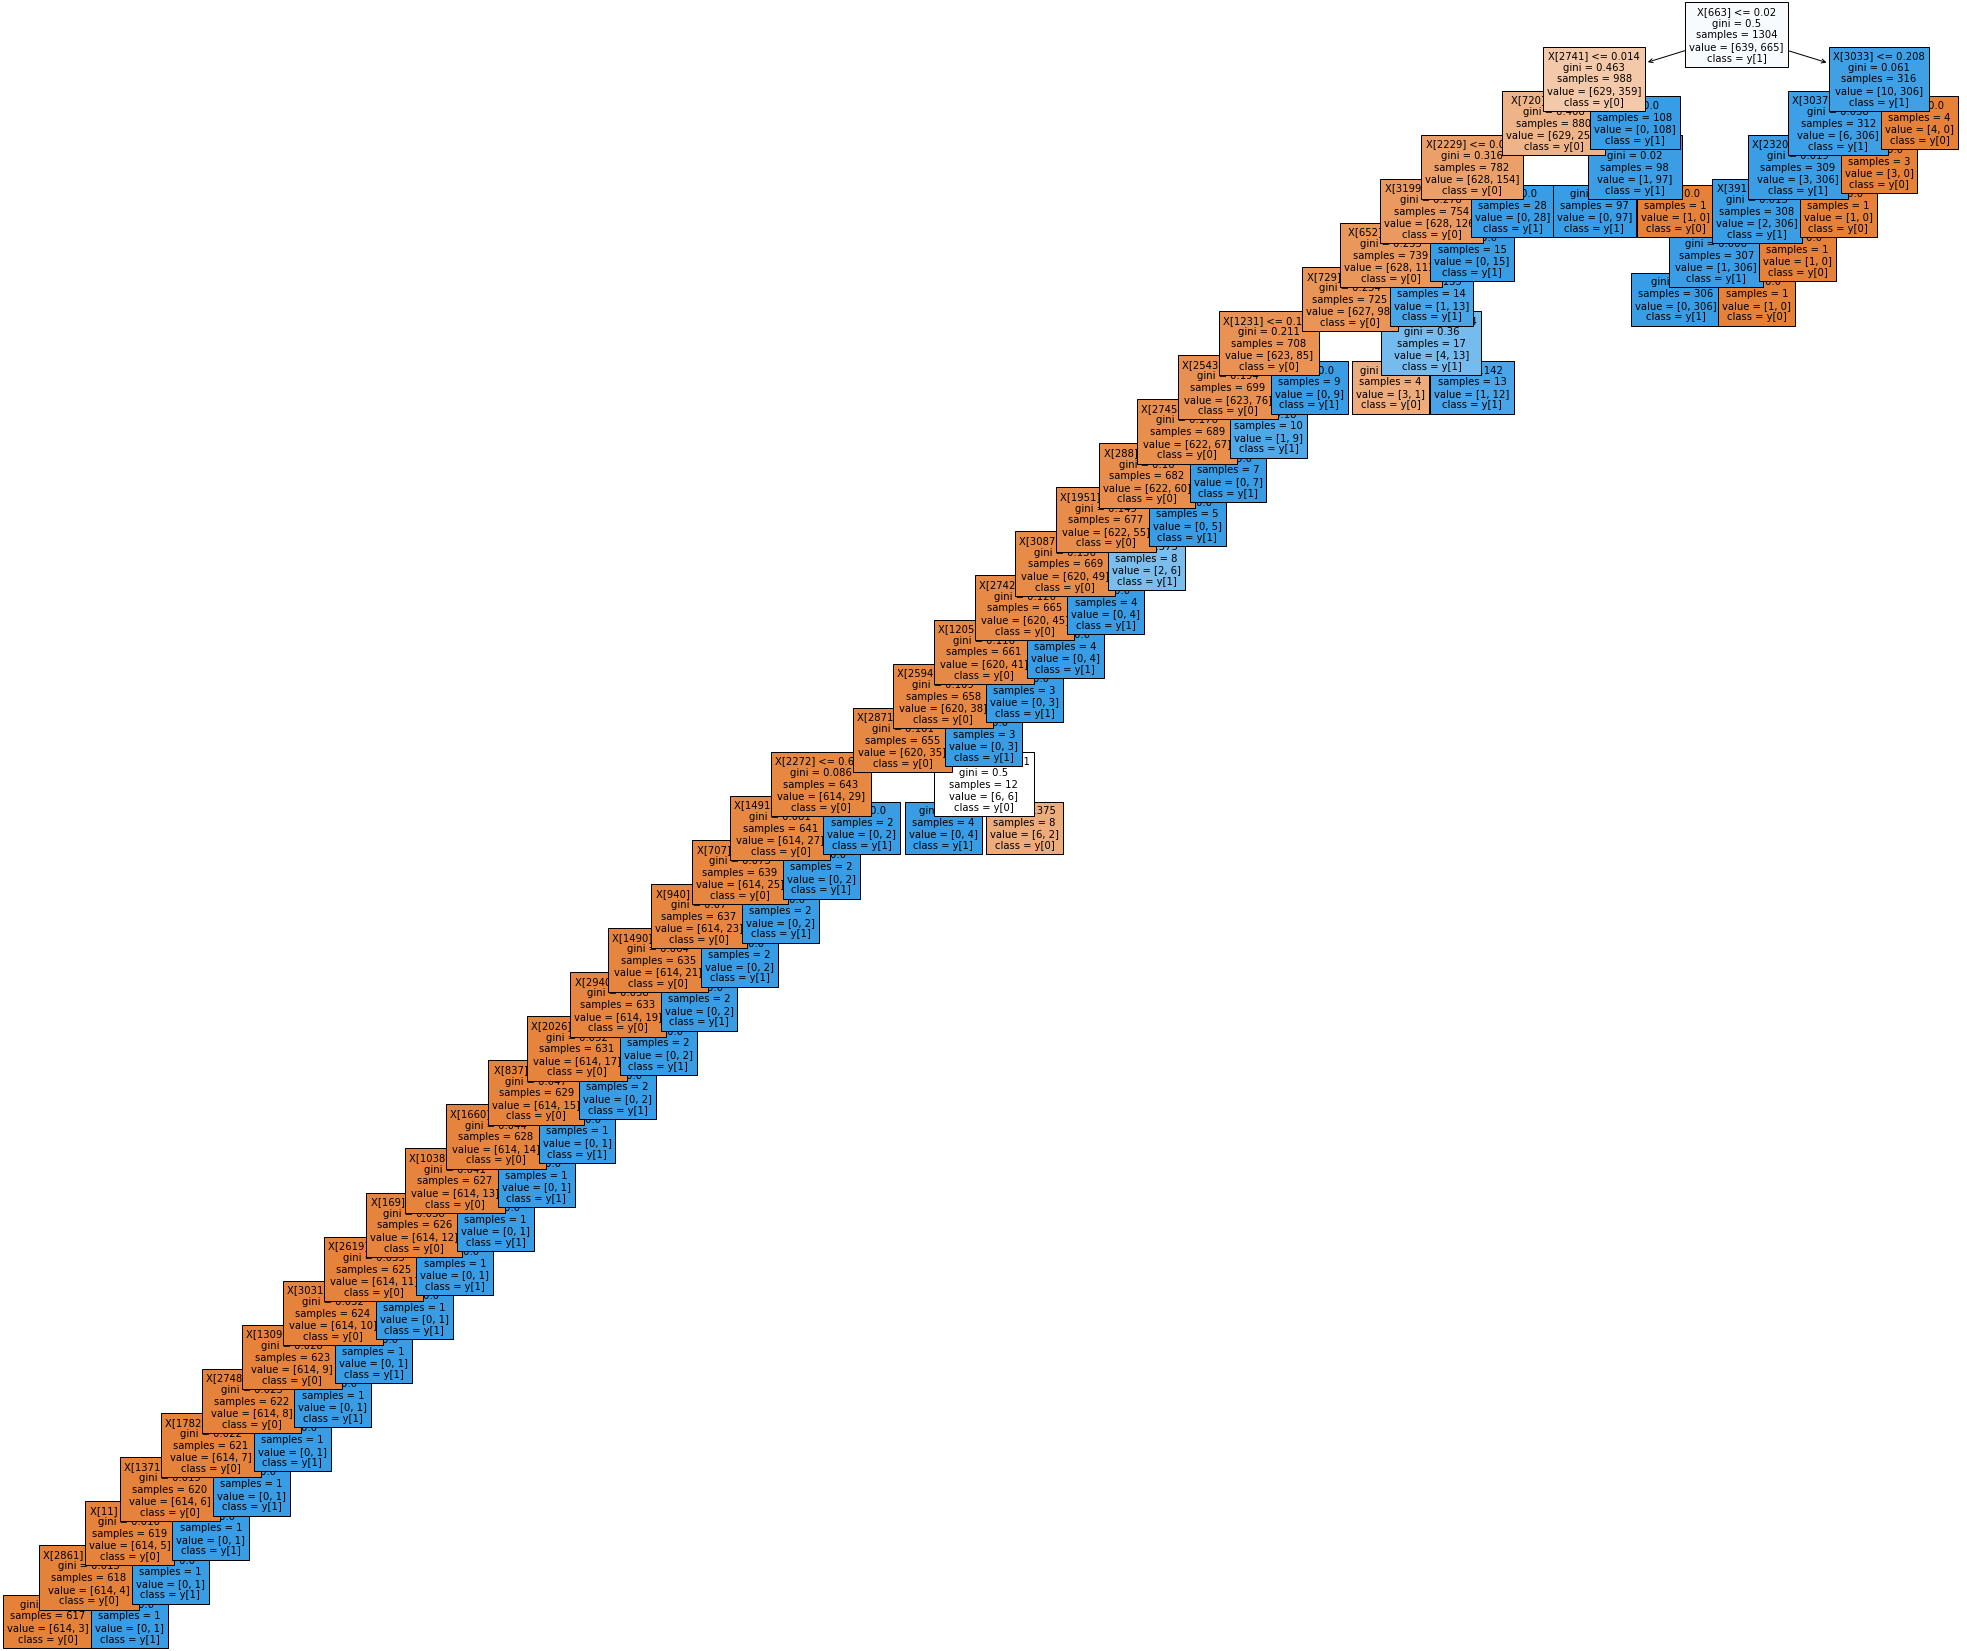

In [52]:
#plotting the structure of the decision tree to be used to classify our testing data
plt.figure(figsize=(35,30))
tree.plot_tree(dt_clf, filled=True, fontsize=10, class_names = True)
plt.show()

In [53]:
dt_prediction=dt_clf.predict(dense_test)

In [54]:
print(classification_report(Y_test,dt_prediction,target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.96      0.96       312
        Spam       0.97      0.96      0.96       340

    accuracy                           0.96       652
   macro avg       0.96      0.96      0.96       652
weighted avg       0.96      0.96      0.96       652



In [55]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [56]:
#creating a confusion matrix from the results
dt_cm= confusion_matrix(Y_test,dt_prediction)

In [57]:
accuracy(dt_cm)*100

96.0122699386503

In [58]:
print(dt_cm)

[[301  11]
 [ 15 325]]


In [59]:
dt_cmd= ConfusionMatrixDisplay(dt_cm)

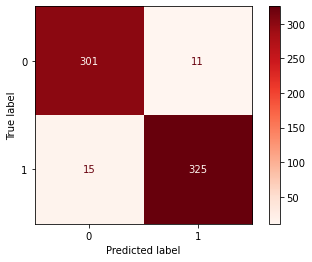

In [60]:
dt_cmd.plot(cmap= 'Reds')

# Using Pipeline for Data Normalization and Classification

### Creating custom transformer to convert sparse matrix into dense array

In [72]:
from sklearn.base import BaseEstimator,TransformerMixin

In [73]:
class DenseTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        return None
    
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

### Naive Bayes Classification Model

In [74]:
from sklearn.pipeline import Pipeline

In [75]:
#creating a pipeline with transformers and MultinomialNB as the estimator
pipeline_nb = Pipeline([
    ('bow', CountVectorizer(analyzer='word', strip_accents='unicode')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),# integer counts to weighted TF-IDF scores
    ('todense',DenseTransformer()),
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [76]:
pipeline_nb.fit(X_train, Y_train)

Pipeline(steps=[('bow', CountVectorizer(strip_accents='unicode')),
                ('tfidf', TfidfTransformer()), ('todense', DenseTransformer()),
                ('classifier', MultinomialNB())])

In [77]:
nb_prediction = pipeline_nb.predict(X_test)

In [78]:
print(classification_report(Y_test,nb_prediction, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.94      0.88      0.91       312
        Spam       0.90      0.95      0.92       340

    accuracy                           0.92       652
   macro avg       0.92      0.92      0.92       652
weighted avg       0.92      0.92      0.92       652



In [79]:
nb_cm = confusion_matrix(Y_test,nb_prediction)

In [80]:
accuracy(nb_cm)*100

91.71779141104295

In [81]:
print(nb_cm)

[[274  38]
 [ 16 324]]


In [82]:
nb_cmd= ConfusionMatrixDisplay(nb_cm)

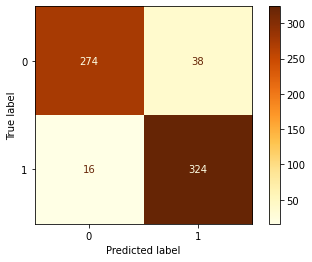

In [83]:
nb_cmd.plot(cmap='YlOrBr')

### Support Vector Machine(SVM) Classification Model

In [90]:
#creating a pipeline with transformers and MultinomialNB as the estimator
pipeline_svm = Pipeline([
    ('bow', CountVectorizer(analyzer='word', strip_accents='unicode')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),# integer counts to weighted TF-IDF scores
    ('todense',DenseTransformer()),
    ('scaler', StandardScaler()), #scaling the values
    ('classifier', SVC(kernel='linear', verbose=True, random_state=101))  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [91]:
pipeline_svm.fit(X_train, Y_train.values.ravel())

[LibSVM]

Pipeline(steps=[('bow', CountVectorizer(strip_accents='unicode')),
                ('tfidf', TfidfTransformer()), ('todense', DenseTransformer()),
                ('scaler', StandardScaler()),
                ('classifier',
                 SVC(kernel='linear', random_state=101, verbose=True))])

In [92]:
svm_prediction = pipeline_svm.predict(X_test)

In [93]:
print(classification_report(Y_test,svm_prediction, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.87      0.96      0.91       312
        Spam       0.96      0.87      0.91       340

    accuracy                           0.91       652
   macro avg       0.92      0.92      0.91       652
weighted avg       0.92      0.91      0.91       652



In [94]:
svm_cm = confusion_matrix(Y_test,svm_prediction)

In [95]:
accuracy(svm_cm)*100

91.41104294478528

In [96]:
print(svm_cm)

[[299  13]
 [ 43 297]]


In [97]:
linsvm_cmd= ConfusionMatrixDisplay(svm_cm)

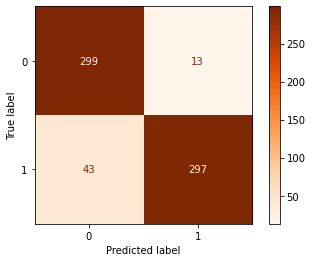

In [98]:
linsvm_cmd.plot(cmap='Oranges')

### Random Forest Classification Model

In [99]:
pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('todense',DenseTransformer()),
    ('RandomForest', RandomForestClassifier(n_estimators=200,criterion='gini', max_leaf_nodes=55, random_state=42)),  
])

In [100]:
pipeline_rf.fit(X_train, Y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('todense', DenseTransformer()),
                ('RandomForest',
                 RandomForestClassifier(max_leaf_nodes=55, n_estimators=200,
                                        random_state=42))])

In [101]:
rf_prediction=pipeline_rf.predict(X_test)

In [102]:
print(classification_report(Y_test,rf_prediction,target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.93      0.97      0.95       312
        Spam       0.98      0.93      0.95       340

    accuracy                           0.95       652
   macro avg       0.95      0.95      0.95       652
weighted avg       0.95      0.95      0.95       652



In [103]:
rf_cm= confusion_matrix(Y_test,rf_prediction)

In [104]:
print(rf_cm)

[[304   8]
 [ 24 316]]


In [105]:
accuracy(rf_cm)*100

95.0920245398773

In [106]:
rf_cmd= ConfusionMatrixDisplay(rf_cm)

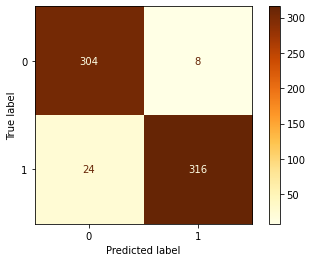

In [107]:
rf_cmd.plot(cmap='YlOrBr')

## Artificial Neural Network

In [108]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [109]:
scaler_ann=MinMaxScaler()

In [124]:
model = Sequential()
model.add(Dense(1028,activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [125]:
dense_train.min()

0.0

In [116]:
# X_train_ann=scaler_ann.fit_transform(dense_train)
# Y_train=Y_train.astype(float)
# X_train_ann

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
# X_test_ann=scaler_ann.fit_transform(dense_test)
# Y_test=Y_test.astype(float)

In [118]:
earlystop=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [126]:
model.fit(dense_train, Y_train, epochs=600, batch_size=5, validation_data=(dense_test,Y_test), callbacks=[earlystop])

Epoch 1/600
261/261 [==============================] - 4s 12ms/step - loss: 0.4669 - accuracy: 0.8282 - val_loss: 0.3904 - val_accuracy: 0.9463
Epoch 2/600
261/261 [==============================] - 3s 12ms/step - loss: 0.3269 - accuracy: 0.9463 - val_loss: 0.4117 - val_accuracy: 0.9402
Epoch 3/600
261/261 [==============================] - 3s 12ms/step - loss: 0.2826 - accuracy: 0.9586 - val_loss: 0.2964 - val_accuracy: 0.9417
Epoch 4/600
261/261 [==============================] - 3s 12ms/step - loss: 0.2391 - accuracy: 0.9678 - val_loss: 0.2664 - val_accuracy: 0.9463
Epoch 5/600
261/261 [==============================] - 3s 12ms/step - loss: 0.2046 - accuracy: 0.9755 - val_loss: 0.2719 - val_accuracy: 0.9463
Epoch 6/600
261/261 [==============================] - 3s 12ms/step - loss: 0.1810 - accuracy: 0.9778 - val_loss: 0.2569 - val_accuracy: 0.9463
Epoch 7/600
261/261 [==============================] - 3s 12ms/step - loss: 0.1642 - accuracy: 0.9778 - val_loss: 0.2452 - val_accuracy:

<AxesSubplot:>

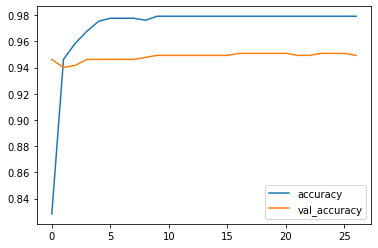

In [127]:
losses=pd.DataFrame(model.history.history)
accuracyy=losses[['accuracy', 'val_accuracy']]
accuracyy.plot()

<AxesSubplot:>

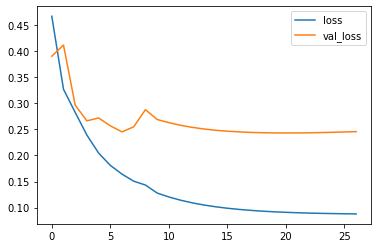

In [128]:
losses=losses.drop(['accuracy', 'val_accuracy'], axis=1)
losses.plot()

In [129]:
Y_pred_d2_ann = (model.predict(X_test_ann) > 0.5).astype("int32")

In [130]:
print(classification_report(Y_test,Y_pred_d2_ann))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       312
         1.0       0.92      0.96      0.94       340

    accuracy                           0.94       652
   macro avg       0.94      0.93      0.94       652
weighted avg       0.94      0.94      0.94       652



In [131]:
ann_cm=confusion_matrix(Y_test,Y_pred_d2_ann)

In [132]:
accuracy(ann_cm)*100

93.55828220858896

In [134]:
print(ann_cm)

[[283  29]
 [ 13 327]]


In [135]:
ann_cmd= ConfusionMatrixDisplay(ann_cm)

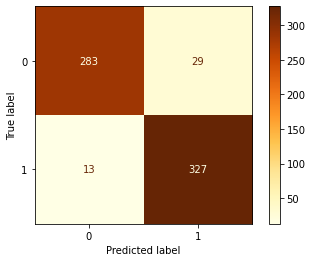

In [137]:
ann_cmd.plot(cmap='YlOrBr')